In [1]:
suppressMessages(suppressWarnings(source("../config/config_sing.R")))
library(fgsea)
show_env()

You are in Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/out 
CODE DIRECTORY (FD_CODE): /data/reddylab/Kuei/code 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS (FD_RES): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 
PATH OF LOG     (FD_LOG): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc/log 


In [2]:
### set file directories
fdiry = file.path(FD_RES, "results", "comparison")
fname = "result.ranknorm.starrmpra.tsv"
fpath = file.path(fdiry, fname)

### read data
dat = read_tsv(fpath)

### assign and show
dat_peak_log2fc = dat
print(dim(dat))
head(dat)

Rows: 5166 Columns: 10
── Column specification ────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (6): Chrom, Peak, TMPRA_Gene, TMPRA_Dataset, CRISPR_HCFF, Assay
dbl (4): Start, End, Log2FC, RankNorm_Total

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 5166   10


Chrom,Start,End,Peak,TMPRA_Gene,TMPRA_Dataset,CRISPR_HCFF,Assay,Log2FC,RankNorm_Total
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
chr11,4539569,4540043,chr11_4539569_4540043,HBE1,OL45,"HBE1,HBG1,HBG2,HBS1L,MYB",ASTARR,0.14501695,0.6550523
chr11,4551336,4552012,chr11_4551336_4552012,HBE1,OL45,NA,ASTARR,0.32125162,0.7560976
chr11,4553969,4555012,chr11_4553969_4555012,HBE1,OL45,NA,ASTARR,0.14529397,0.6556330
chr11,4569016,4569992,chr11_4569016_4569992,HBE1,OL45,NA,ASTARR,0.01136464,0.5673635
chr11,4577444,4578031,chr11_4577444_4578031,HBE1,OL45,NA,ASTARR,0.24524353,0.7154472
chr11,4601808,4602487,chr11_4601808_4602487,HBE1,OL45,NA,ASTARR,-0.57215284,0.1277584


In [3]:
fdiry = file.path(FD_RES, "results", "region", "KS91_K562_ASTARRseq_peak_macs_input", "summary")
fname = "peak.summary.ccre.tsv"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath)

dat_peak_annot_ccre_v3 = dat %>% dplyr::filter(Annotation == "ccre_v3")
dat_peak_annot_ccre_v4 = dat %>% dplyr::filter(Annotation == "ccre_v4")
print(dim(dat))
head(dat)

Rows: 451244 Columns: 4
── Column specification ────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): Peak, Category, Annotation
dbl (1): Count

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 451244      4


Peak,Category,Annotation,Count
<chr>,<chr>,<chr>,<dbl>
chr10_100009096_100010466,"DNase-H3K4me3,CTCF-bound",ccre_v3,2
chr10_100009096_100010466,Low-DNase,ccre_v3,1
chr10_100009096_100010466,"PLS,CTCF-bound",ccre_v3,1
chr10_100020710_100021134,Low-DNase,ccre_v3,2
chr10_100045961_100046653,"CTCF-only,CTCF-bound",ccre_v3,1
chr10_100065094_100065486,Low-DNase,ccre_v3,1


In [5]:
dat = dat_peak_annot_ccre_v3
lst = split(dat$Peak, dat$Category)

lst_annot = lst
3846
print(length(lst))
print(names(lst))
cat("\n\n")

for (idx in names(lst_annot)){
    x = lst_annot[[idx]]
    cat(idx, length(x), "\n")
    print(head(x))
    cat("\n\n")
}

[1] 11
 [1] "CTCF-only,CTCF-bound"     "dELS"                    
 [3] "dELS,CTCF-bound"          "DNase-H3K4me3"           
 [5] "DNase-H3K4me3,CTCF-bound" "DNase-only"              
 [7] "Low-DNase"                "pELS"                    
 [9] "pELS,CTCF-bound"          "PLS"                     
[11] "PLS,CTCF-bound"          


CTCF-only,CTCF-bound 12088 
[1] "chr10_100045961_100046653" "chr10_100338359_100339077"
[3] "chr10_100342247_100342824" "chr10_100433434_100434444"
[5] "chr10_100561032_100563457" "chr10_100670731_100671588"


dELS 9237 
[1] "chr10_100358645_100359733" "chr10_100370571_100371646"
[3] "chr10_1008874_1009782"     "chr10_101042559_101043551"
[5] "chr10_101066038_101068076" "chr10_101535682_101537113"


dELS,CTCF-bound 1994 
[1] "chr10_101066038_101068076" "chr10_101748332_101750218"
[3] "chr10_101835785_101836530" "chr10_102057753_102058495"
[5] "chr10_102112241_102115343" "chr10_102117513_102118070"


DNase-H3K4me3 2896 
[1] "chr10_100481467_100483191" "chr1

In [6]:
dat = dat_peak_log2fc
dat = dat %>% 
    dplyr::group_by(Peak) %>% 
    dplyr::summarise(
        RankNorm = mean(RankNorm_Total),
        .groups  = "drop") %>%
    dplyr::arrange(RankNorm)

head(dat)

Peak,RankNorm
<chr>,<dbl>
chrX_48996933_48997220,0.002129307
chr8_128298518_128298762,0.009291521
chr8_128242220_128242507,0.039876113
chr11_34024311_34024546,0.040456833
chr8_128189792_128190210,0.041231127
chr20_56703281_56703575,0.048199768


In [7]:
dat = dat_peak_log2fc
dat = dat %>% 
    dplyr::group_by(Peak) %>% 
    dplyr::summarise(
        RankNorm = mean(RankNorm_Total),
        .groups  = "drop") %>%
    dplyr::arrange(RankNorm)

vec = dat$RankNorm
names(vec) = dat$Peak

vec_peak = vec
print(length(vec))
print(head(vec))

[1] 1722
  chrX_48996933_48997220 chr8_128298518_128298762 chr8_128242220_128242507 
             0.002129307              0.009291521              0.039876113 
 chr11_34024311_34024546 chr8_128189792_128190210  chr20_56703281_56703575 
             0.040456833              0.041231127              0.048199768 


In [8]:
set.seed(42)
fgseaRes = fgsea(pathways  = lst_annot, 
                 stats     = vec_peak,
                 eps       = 0.0,
                 #minSize   = 15,
                 #maxSize   = 500,
                 scoreType = "pos"
                )

print(class(fgseaRes))

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (13.24% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”


[1] "data.table" "data.frame"


In [11]:
dat = fgseaRes
dat = dat %>% 
    dplyr::select(pathway, pval, padj, log2err, ES, NES, size) %>%
    dplyr::mutate(nLogP = -log10(padj))
head(dat)

pathway,pval,padj,log2err,ES,NES,size,nLogP
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
"CTCF-only,CTCF-bound",6.093906e-02,6.703297e-02,0.1797823,0.2931971,1.335655,80,1.1737116
DNase-H3K4me3,1.268731e-01,1.268731e-01,0.1198878,0.3977387,1.378297,14,0.8966304
"DNase-H3K4me3,CTCF-bound",1.907497e-02,2.622808e-02,0.3524879,0.5601636,1.799412,10,1.5812335
DNase-only,3.904027e-03,6.134899e-03,0.4317077,0.3858264,1.658223,50,2.2121926
Low-DNase,5.694306e-02,6.703297e-02,0.1864326,0.2232089,1.177959,780,1.1737116
PLS,6.860061e-24,3.773034e-23,1.2627399,0.6124824,2.877429,109,22.4233093


In [12]:
theme_color = scale_colour_gradient(low = "#fcbba1", high = "#cb181d")

theme_text = theme(
        axis.text.x = element_text(size=15),
        axis.text.y = element_text(size=15)
)

theme_grid = theme(
    panel.grid.major.x = element_line(
        color     = "grey90",
        linewidth = 0.5,
        linetype  = 1),
    panel.grid.major.y = element_line(
        color     = "grey90",
        linewidth = 0.5,
        linetype  = 1),
    panel.grid.minor.y = element_line(
        color     = "grey90",
        linewidth = 0.5,
        linetype  = 1)
)

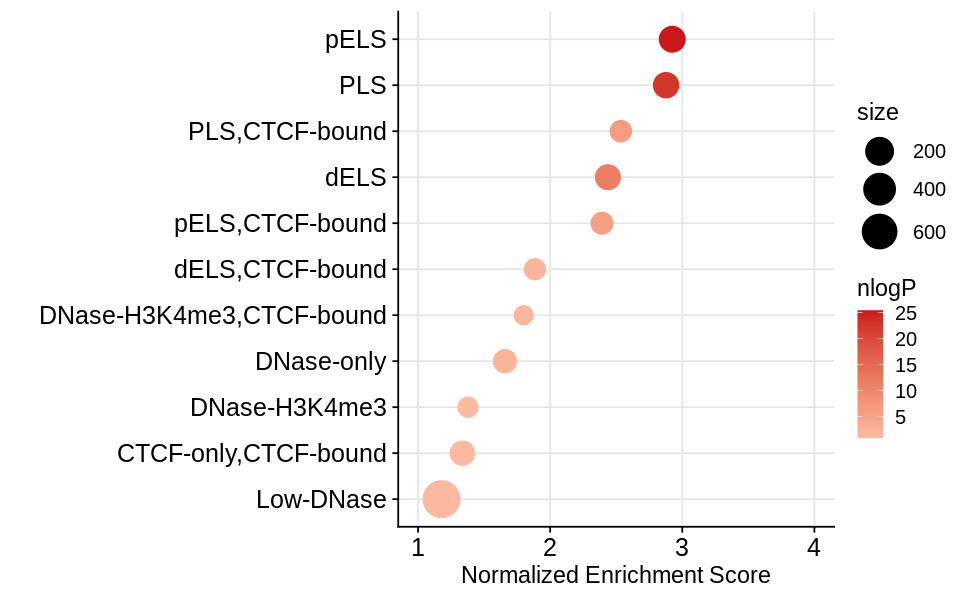

In [13]:
dat = fgseaRes
dat = dat %>% 
    dplyr::select(pathway, pval, padj, log2err, ES, NES, size) %>%
    dplyr::mutate(nlogP = -log10(padj)) %>%
    dplyr::arrange(NES) %>%
    dplyr::mutate(pathway = factor(pathway, levels=pathway))

gpt = ggplot(dat, aes(x = NES, y=pathway, size=size, color=nlogP)) + 
    geom_point() + 
    scale_size(range = c(5, 10)) +
    xlim(1, 4.0) +
    labs(x = "Normalized Enrichment Score", y = "") +
    theme_cowplot() +
    theme_grid +
    theme_text +
    theme_color

options(repr.plot.height=5, repr.plot.width=8)
print(gpt)

In [22]:
dat = fgseaRes
dat = dat %>% 
    dplyr::select(pathway, pval, padj, log2err, ES, NES, size) %>%
    dplyr::mutate(nlogP = -log10(padj)) %>%
    dplyr::mutate(pathway = factor(pathway, levels=pathway))
dat

pathway,pval,padj,log2err,ES,NES,size,nlogP
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
"CTCF-only,CTCF-bound",6.093906e-02,6.703297e-02,0.1797823,0.2931971,1.335655,80,1.1737116
DNase-H3K4me3,1.268731e-01,1.268731e-01,0.1198878,0.3977387,1.378297,14,0.8966304
"DNase-H3K4me3,CTCF-bound",1.907497e-02,2.622808e-02,0.3524879,0.5601636,1.799412,10,1.5812335
DNase-only,3.904027e-03,6.134899e-03,0.4317077,0.3858264,1.658223,50,2.2121926
Low-DNase,5.694306e-02,6.703297e-02,0.1864326,0.2232089,1.177959,780,1.1737116
PLS,6.860061e-24,3.773034e-23,1.2627399,0.6124824,2.877429,109,22.4233093
"PLS,CTCF-bound",1.717779e-07,4.723893e-07,0.6901325,0.6548939,2.535078,25,6.3256999
dELS,3.863003e-13,1.416434e-12,0.9325952,0.5251367,2.437213,96,11.8488035
"dELS,CTCF-bound",3.607315e-03,6.134899e-03,0.4317077,0.4973922,1.885144,21,2.2121926


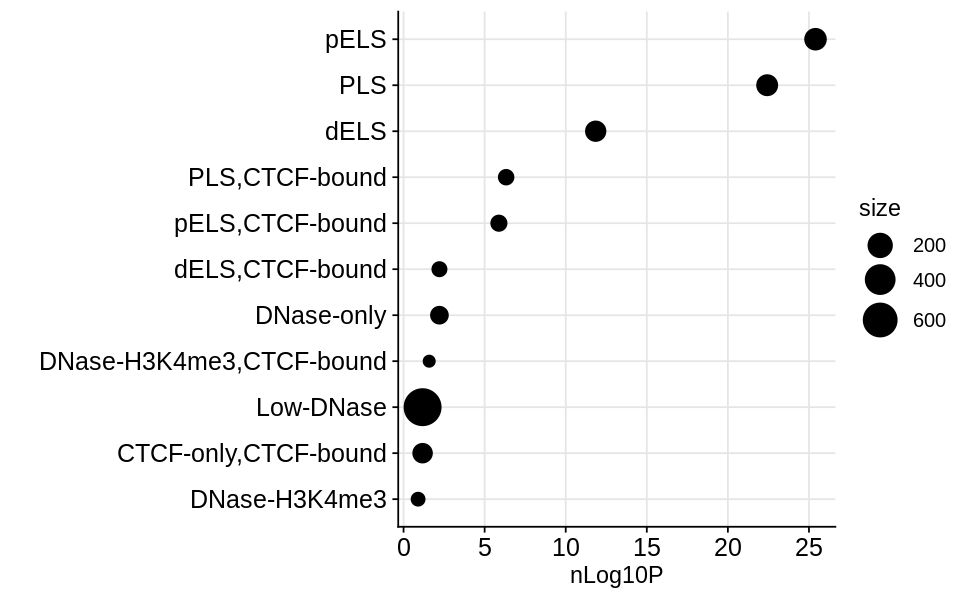

In [34]:
dat = fgseaRes
dat = dat %>% 
    dplyr::select(pathway, pval, padj, log2err, ES, NES, size) %>%
    dplyr::mutate(nlogP = -log10(padj)) %>%
    dplyr::arrange(nlogP) %>%
    dplyr::mutate(pathway = factor(pathway, levels=pathway))
    
gpt = ggplot(dat, aes(x = nlogP, y=pathway, size=size)) + 
    geom_point() + 
    scale_size(range = c(3, 10)) +
    labs(x = "nLog10P", y = "") +
    theme_cowplot() +
    theme_grid +
    theme_text

options(repr.plot.height=5, repr.plot.width=8)
print(gpt)

In [30]:
dat$pathway

[1] DNase-H3K4me3            CTCF-only,CTCF-bound     Low-DNase               
 [4] DNase-H3K4me3,CTCF-bound DNase-only               dELS,CTCF-bound         
 [7] pELS,CTCF-bound          PLS,CTCF-bound           dELS                    
[10] PLS                      pELS                    
11 Levels: DNase-H3K4me3 CTCF-only,CTCF-bound ... pELS

In [32]:
length(dat$pathway)

[1] 11

In [33]:
'DNase-H3K4me3', 'CTCF-only,CTCF-bound', 'Low-DNase', 'DNase-H3K4me3,CTCF-bound', 'DNase-only', 'dELS,CTCF-bound', 'pELS,CTCF-bound', 'PLS,CTCF-bound', 'dELS', 'PLS', 'pELS'

ERROR: Error in parse(text = x, srcfile = src): <text>:1:16: unexpected ','
1: 'DNase-H3K4me3',
                   ^
